In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron
from dist_network import DistNetwork

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

## Pacemakers-driven network

In [4]:
N = 100
P = 10
GC = 30000
DT = .01
TMAX = 500
LAMBDA_D = .1
T_REF = .1
T_SYN = .05

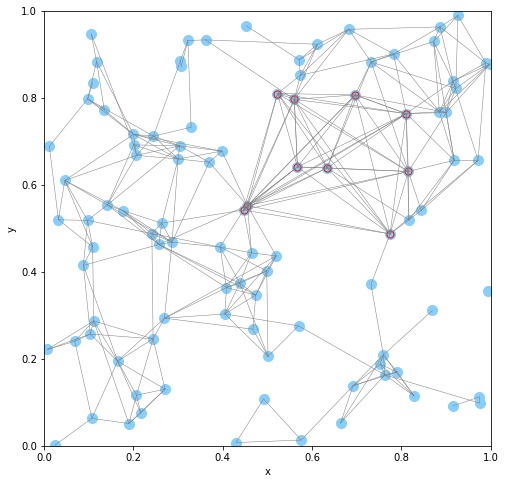

In [5]:
# initiate network
ntwk = DistNetwork(num=N, 
                   gc=GC, 
                   dt=DT, 
                   tmax=TMAX, 
                   pacemakers=[], 
                   t_ref=T_REF, 
                   conn_type='synapse',
                   t_syn=T_SYN,
                   lambda_d=LAMBDA_D)

# define pacemakers
ntwk.pacemakers = ntwk.find_nearst_neighbors(0, P)
for i in range(P):
    n1 = ntwk.pacemakers[i]
    ntwk.neurons[n1].ispacemaker = True
    for j in range(i+1, P):
        n2 = ntwk.pacemakers[j]
        ntwk.add_edge((n1, n2))

# display connection matrix
ntwk.disp_network()

In [6]:
# run the simulation
ntwk.run()

100%|██████████| 49999/49999 [00:17<00:00, 2929.24it/s]


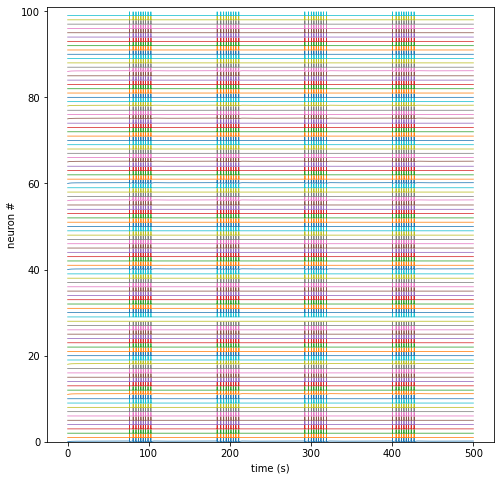

In [7]:
ntwk.disp(figsize=(8, 8), style='trace')

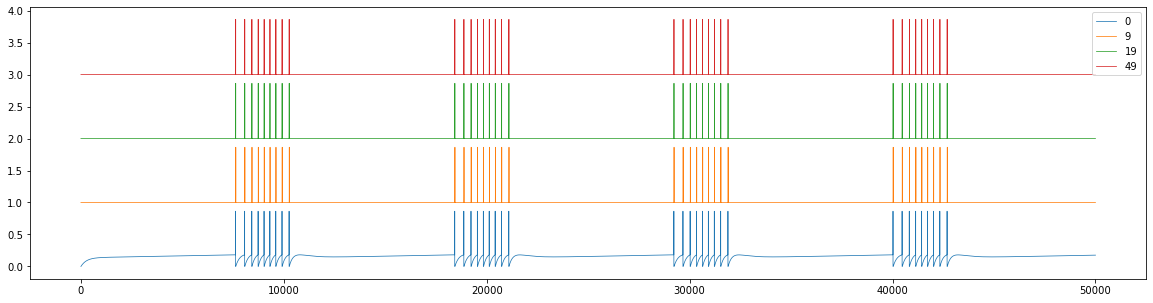

In [8]:
plt.figure(figsize=(20,5))
plt.plot(adjust_train(ntwk.neurons[0].v_train, -75, 110, 0), lw=.75, label='0')
plt.plot(adjust_train(ntwk.neurons[9].v_train, -75, 110, 1), lw=.75, label='9')
plt.plot(adjust_train(ntwk.neurons[19].v_train, -75, 110, 2), lw=.75, label='19')
plt.plot(adjust_train(ntwk.neurons[49].v_train, -75, 110, 3), lw=.75, label='49')
plt.legend()
plt.show()

## Distributed network